In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [3]:
data = pd.read_csv('MSFT.csv')

In [8]:
data = data.dropna(axis=0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9712 non-null   object 
 1   Open       9712 non-null   float64
 2   High       9712 non-null   float64
 3   Low        9712 non-null   float64
 4   Close      9712 non-null   float64
 5   Adj Close  9712 non-null   float64
 6   Volume     9712 non-null   int64  
 7   %K         9704 non-null   float64
 8   %R         9699 non-null   float64
 9   RSI        9698 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 758.9+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

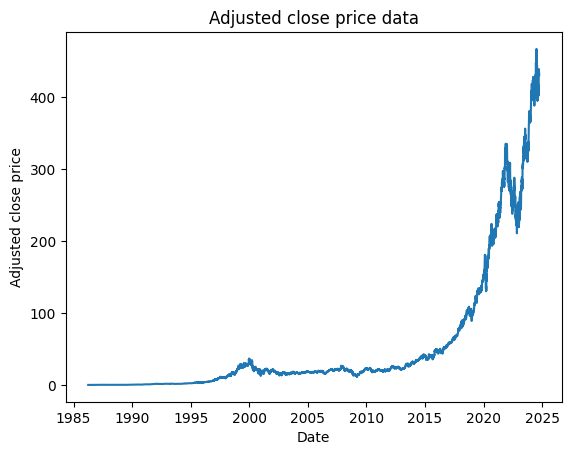

In [10]:
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.title('Adjusted close price data')
plt.show()

In [11]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(title='MSFT Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

fig.show()

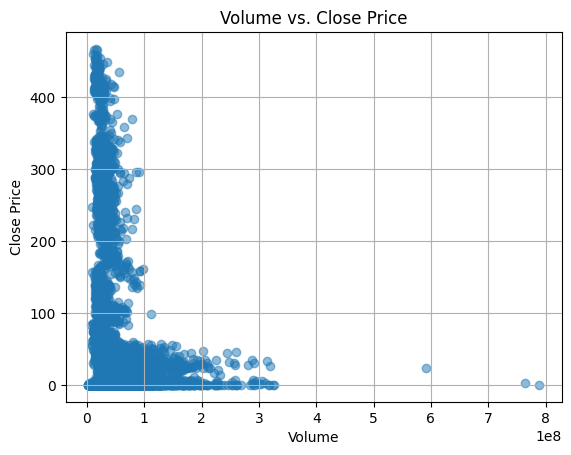

In [12]:
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

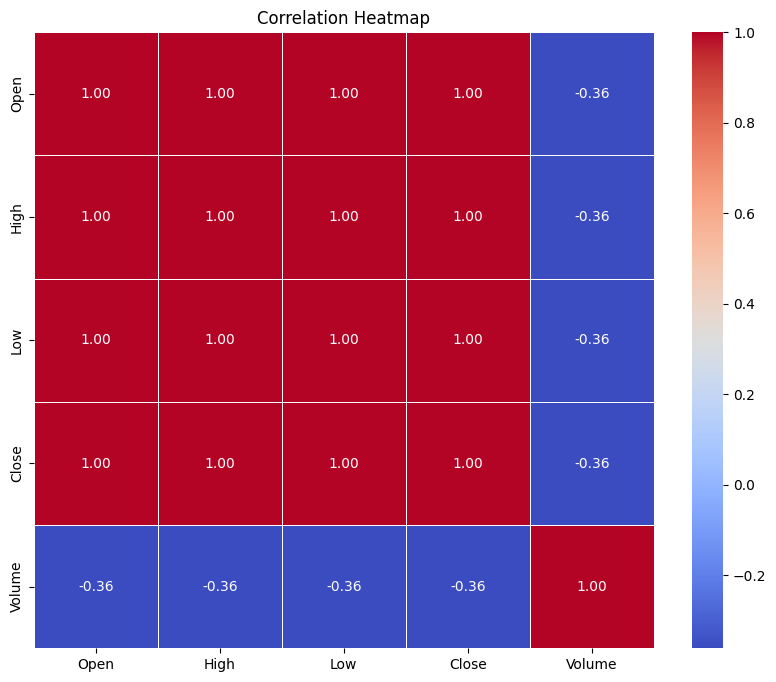

In [14]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()